# Clustering #

Clustering methods are unsupervised learning methods. Given a data set, the methods find groups (clusters) of data points that are most similar by some measurement. For example, for a bunch of data points with (X, Y) coordinates, the data points will be linked by those that are closet in Euclidian space. By analyzing these clusters, we can understand things broadly about the data set. If the data points represent customers and their interests, studying the clusters will help us identify the different "types" of customers.

# k-Means #

Given a data set, cluster the data points into $k$ clusters. Each cluster has a *centroid* which distinguishes the cluster. The aim of the algorithm is to create centroids that minimize the variance in distance from every data point in the cluster to its centroid.

The most common algorithm for performing k-Means is Lloyd's algorithm which consists of the following two steps:

* Assign data points to the cluster with the nearest centroid, measured by Euclidean distance
    * Initially the centroids are often placed in randomly selected positions, though scikit-learn defaults to a "k-means++" method which performs for more informed placement
* Recalculate the position of the centroids from the average of the data points in each cluster. Specifically for cluster $C_k$ located at $c_k$:

<center>$c_k^{t+1} = \frac{1}{|C_k^t|} \sum_{x \in C_k^t} x$</center>

These two steps will continue until:

* the centroid positions don't change
* the assignment of data points to clusters does not change (data points are always assigned to the same cluster)
* the specified number of iterations has been reached


In [9]:
# import necessary packages
from sklearn import datasets, metrics
from sklearn.cluster import KMeans as km

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

### Load Data ###

Import the built-in iris data set. Since I'm implementing an unsupervised method, I won't be using the target labels, nor split the data into a training and set test.

In [2]:
data = datasets.load_iris()
X = data['data']

### Construct the Model ###

The first important part of creating a k-Means model is to decide on the number of clusters. In this case, we'll use the *Silhouette Method*, which measures how similar points are to their own clusters compared to the other clusters creating the Silhouette score.

For a given data point $x_i$ in cluster $C_k$, the Silhouette value is calculated as:

* $s(x_i) = \frac{b(x_i)-a(x_i)}{max(a(x_i), b(x_i))}$ if $|C_k| > 1$
* $s(x_i) = 0$ if $|C_k| = 1$

Where:
* $a(x_i)$ is the average Euclidean distance between $x_i$ and other points in cluster $C_k$
* $b(x_i)$ is the distance between $x_i$ and the nearest cluster that is not $C_k$

Thus, for different possible choices of number of clusters, we'll create a k-Means model and find the Silhouette score. In this case, a larger Silhouette score it better. Then we'll graph the results to find how many clusters we should use.

In this case, we actually know how many classes are in the data set, we'll use that to create an arbitrary upper bound on the number of clusters we'll test. In reality we might not know this and have to test more.

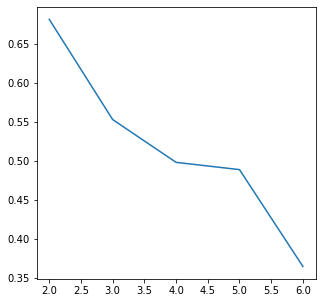

In [7]:
k_vals = np.arange(2, 7)
s_scores = []

# get silhouette scores for models with each number of clusters
for k in k_vals:
    model = km(n_clusters=k)
    model.fit(X)
    labels = model.labels_
    sil = metrics.silhouette_score(X, labels)
    s_scores.append(sil)
    
# graph the silhouette scores
plt.figure(figsize=(5,5))
plt.plot(k_vals, s_scores)
plt.show()

The graph shown above shows that the maximum occurs when $k=2$. Thus, we will use this as the final model.

In [8]:
model = km(n_clusters=2)
model.fit(X)
labels = model.labels_

### Analyze Model Results ###

Since we know the actual labels here, we can graph the result of the k-Means clusters and the actual ground truth labels. For these graphs, I used the [example](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html) from scikit-learn.

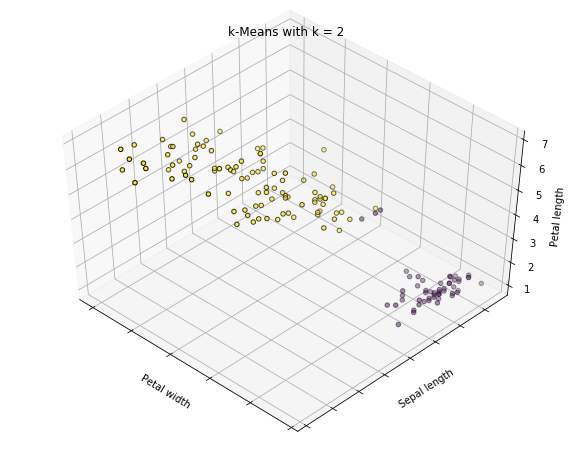

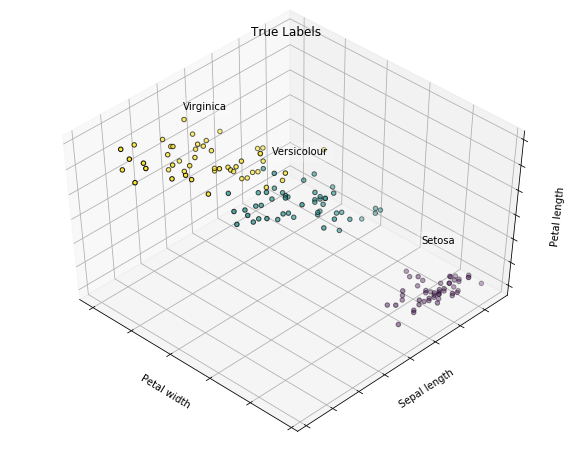

In [14]:
# graph results of the k-Means model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d', elev=48, azim=134)
# for each row, get the appropriate feature column
ax.scatter(X[:,3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')

# don't need the tick labels showing
# just interested in spatially seeing groups
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('k-Means with k = 2')

plt.show()

# graph actual data labels
Y = data['target']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d', elev=48, azim=134)
for name,label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[Y==label, 3].mean(), X[Y==label, 0].mean(), X[Y==label, 2].mean()+2,
             name, horizontalalignment='center', bbox=dict(alpha=0.2, edgecolor='w', facecolor='w'),)

ax.scatter(X[:, 3], X[:, 0], X[:,2], c=Y, edgecolor='k')

# don't show tick labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('True Labels')

plt.show()

From the results, we see that the k-Means with 2 clusters marks the Virginica and Veriscolour classes as one class, which makes sense since they are spatially so close to one another. For comparison, we can see what would happen if we had instead used 3 clusters (theoretically one cluster per class):

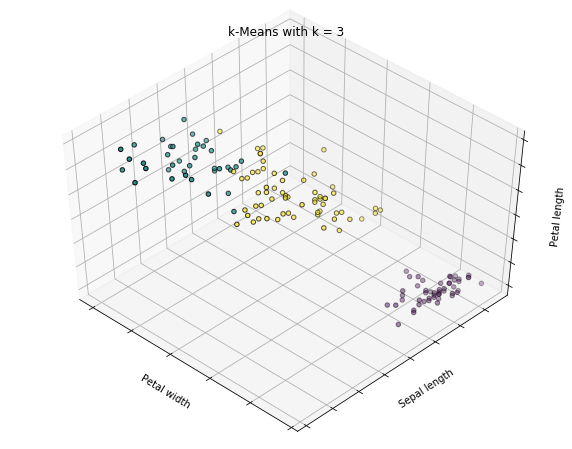

In [15]:
# build model with 3 clusters
model = km(n_clusters=3)
model.fit(X)
labels = model.labels_

# map results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d', elev=48, azim=134)
ax.scatter(X[:,3], X[:,0], X[:,2], c=labels.astype(float), edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('k-Means with k = 3')

plt.show()

Note the results above swap the label coloring for the blue and yellow points between this graph and the true label graph above.

The results show that clustering with $k=3$ actually does not necessarily do a great job at distinguishing between the Virginica and Veriscolour classes. Specifically, the points close to the borders of the clusters are often misclassified, as are a couple of the "outliers", which are points of one class but seem to be close in distance to the other class.

# DBScan #

DBScan is another clustering algorithm used to identify clusters within a data set. Analyzing these clusters can then provide information about subsets of the data points.

DBScan defines a parameter $\epsilon$ which is the distance between a points used for cluster assignment. And *minPts* which is the minimum number of data points required to form a dense cluster.

The overview follows these steps:

* Find the points in the $\epsilon$ region of every point and identify points with more than *minPts* in its region (core points)
* Find the connected components of core points and ignore all non-core points which form clusters
* Assign non-core points to a nearby cluster if the cluster is $\epsilon$ away, otherwise classify it as noise

In [17]:
# import packages
from sklearn import datasets
from sklearn.cluster import DBSCAN

### Import Data ###

Again, I'll import the built-in iris data set. Since this is also a clustering exercise, I will not divide the data into training and testing sets.

In [18]:
data = datasets.load_iris()
X = data['data']

### Construct the Model ###

I'll implement the DBScan model using the default $\epsilon$ and min_samples values of the scikit-learn implementation.

In [21]:
model = DBSCAN()
labels = model.fit_predict(X)
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


### Evalute the Model ###

The above results show that DBScan also identifies only 2 clusters. The -1 identifies outliers that are unable to be classified.

I'll evalute the model by graphing the clusters as I did for the k-Means algorithm. As a reminder, I'll graph the true labels as well.

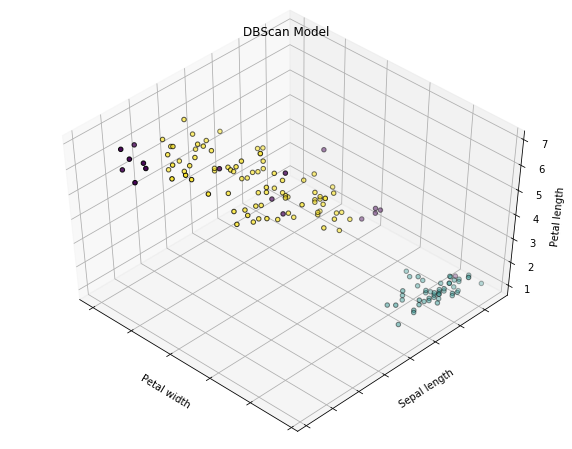

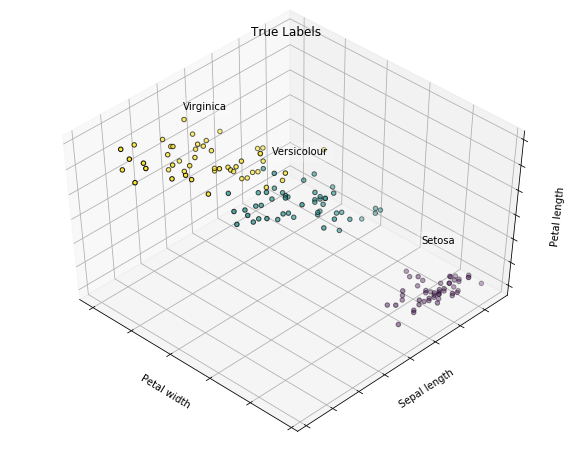

In [20]:
# graph results of the k-Means model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d', elev=48, azim=134)
# for each row, get the appropriate feature column
ax.scatter(X[:,3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')

# don't need the tick labels showing
# just interested in spatially seeing groups
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('DBScan Model')

plt.show()

# graph actual data labels
Y = data['target']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d', elev=48, azim=134)
for name,label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[Y==label, 3].mean(), X[Y==label, 0].mean(), X[Y==label, 2].mean()+2,
             name, horizontalalignment='center', bbox=dict(alpha=0.2, edgecolor='w', facecolor='w'),)

ax.scatter(X[:, 3], X[:, 0], X[:,2], c=Y, edgecolor='k')

# don't show tick labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('True Labels')

plt.show()

Again, this shows that the DBScan algorithm also does not differentiate between Virginica and Versicolour classes. Though DBScan does note some of the data points as outliers that it is not quite as sure about. The outliers include some that definitely on the periphery of the classes.